<a href="https://colab.research.google.com/github/saja-aish12/MachineLearning/blob/master/machine_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import sklearn.linear_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
# %matplotlib notebook


In [2]:
data = pd.read_csv('WB.csv')

In [3]:
data.head()

,FID,OBJECTID,NAMEAR,NAMEEN,CORONA__Ca,Population,PopDensity,AgingRatio,ServicesHi,HealthServ,Landuse,Commercial,RoadDensit,GreenAreas,Open_spave
0,0,12,??????,Hebron (Al Khalil),7299,15988,5.92,0.02000,5,100,2.7861,0.001750,0.04670,0.080100,0.8651
1,1,15,??? ?????,Deir Istiya,139,3930,4.20,0.04700,1,8,2.3300,0.004900,0.16400,0.000000,0.8800
2,2,21,????,Battir,63,4966,3.00,0.05000,1,12,2.8200,0.000000,0.03200,0.000000,0.9100
3,3,23,?????,Surif,181,18534,3.70,0.02579,1,30,2.6985,0.002074,0.10506,0.002709,0.9201
4,4,24,??? ???,Beit Ummar,418,18202,2.00,0.03300,2,34,2.3700,0.003000,0.07800,0.162000,0.8940


In [141]:
from sklearn.preprocessing import StandardScaler
X = data[['Population','PopDensity','AgingRatio','ServicesHi','HealthServ','Landuse','Commercial','RoadDensit','GreenAreas','Open_spave']]
y = data['CORONA__Ca']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10) 

#x = pd.DataFrame(x)

In [142]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(X_train)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

principalComponents = pd.DataFrame(principalComponents)#
principalComponents.head()

#x_pca = pca.fit_transform(x)
#x_pca = pd.DataFrame(x_pca)
#x_pca.head()

,0,1,2
0,-5705.137255,-43.094877,0.472017
1,9176.808543,-7.667394,-20.917780
2,3217.850324,-25.194410,-2.355285
3,6494.851957,-18.606996,0.934261
4,-1826.151183,-30.615117,-1.102480


In [143]:
finalDf = pd.concat([principalDf,y_train], axis = 1)
finalDf = pd.DataFrame(finalDf)#
finalDf.head()#

,principal component 1,principal component 2,principal component 3,CORONA__Ca
0,-5705.137255,-43.094877,0.472017,7299.0
1,9176.808543,-7.667394,-20.917780,NaN
2,3217.850324,-25.194410,-2.355285,NaN
3,6494.851957,-18.606996,0.934261,181.0
4,-1826.151183,-30.615117,-1.102480,418.0


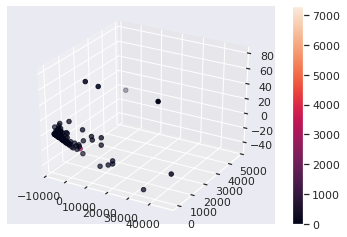

In [144]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = finalDf['principal component 1']
ydata = finalDf['principal component 2']
zdata = finalDf['principal component 3']
#ax.scatter3D(xdata, ydata, zdata)
scatter_plot = ax.scatter3D(xdata, ydata, zdata,c=finalDf['CORONA__Ca'])
plt.colorbar(scatter_plot)
plt.show()

In [145]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [113]:
#train_f1 = []
#test_f1 = []
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier()
#knn.fit(X_train, y_train)
#y_pred_train = knn.predict(X_train)
#y_pred_test = knn.predict(X_test)
#train_f1.append(f1_score(y_train, y_pred_train))
#test_f1.append(f1_score(y_test, y_pred_test))


In [ ]:
X_test

In [ ]:
clf.predict(X_test)

In [ ]:
y_test

In [147]:
clf.score(X_test, y_test)

0.584225626010759

In [ ]:
#####################################PART_2###########################################################

In [148]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
sns.scatterplot( data['Population'],data['CORONA__Ca'],data['PopDensity'],data['AgingRatio'],data['ServicesHi'],data['HealthServ'])

In [ ]:
sns.scatterplot(data['CORONA__Ca'],data['Population'])

In [ ]:
sns.scatterplot(data['CORONA__Ca'],data['PopDensity'])

In [ ]:
sns.scatterplot(data['CORONA__Ca'],data['AgingRatio'])

In [ ]:
sns.scatterplot(data['CORONA__Ca'],data['ServicesHi'])

In [ ]:
sns.scatterplot(data['CORONA__Ca'],data['HealthServ'])

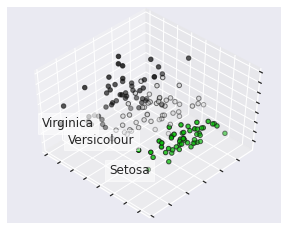

In [ ]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)



for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()